{1: [15, 28], 2: [9, 20], 3: [75, 22], 4: [71, 34], 5: [40, 26]}


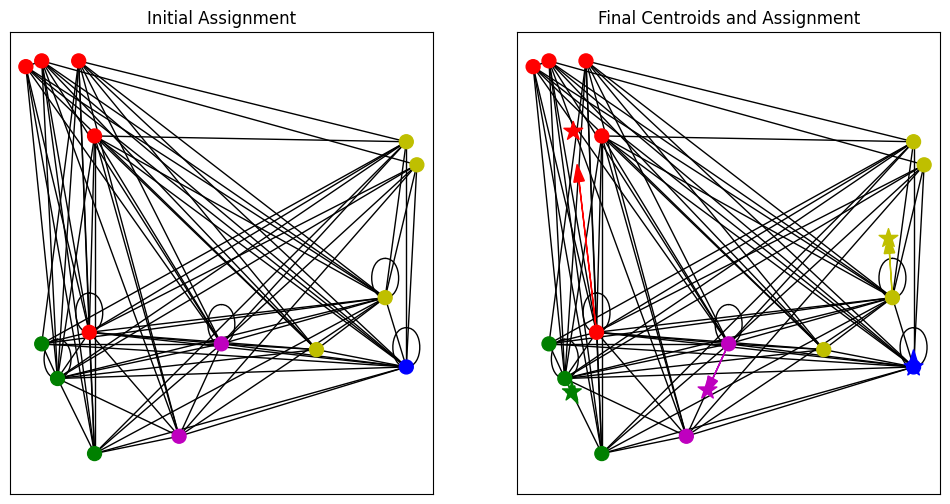

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import copy

# Creazione del grafo
G = nx.gnm_random_graph(n=10, m=20, seed=42)

# Centroidi
np.random.seed(20)
k = 5
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}

# Definizione del dizionario "colmap"
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'y', 5: 'm'}

# Lista dei nodi dei centroidi
centroid_nodes_list = []

# Aggiungi i punti dati come nodi al grafo con la chiave 'closest' e 'color'
for node in G.nodes():
    G.nodes[node]['pos'] = (np.random.randint(0, 80), np.random.randint(0, 80))
    G.nodes[node]['color'] = 'b'
    G.nodes[node]['closest'] = None

# Aggiungi i centroidi come nodi al grafo e aggiungi i nodi alla lista dei centroidi
for i in centroids.keys():
    centroid_coords = centroids[i]
    centroid_node = f'Centroid_{i}'
    centroid_nodes_list.append(centroid_node)
    G.add_node(centroid_node, pos=centroid_coords, color=colmap[i], closest=None)

# Calcola le distanze tra punti e centroidi e crea gli archi del grafo
for node in G.nodes():
    for centroid in centroids.keys():
        centroid_coords = centroids[centroid]
        distance = np.sqrt((G.nodes[node]['pos'][0] - centroid_coords[0])**2 + (G.nodes[node]['pos'][1] - centroid_coords[1])**2)
        G.add_edge(node, f'Centroid_{centroid}', weight=distance)

# Funzione di assegnazione dei nodi ai centroidi più vicini
def assignment(G, centroids):
    for node in G.nodes():
        if not G.nodes[node]['closest'] or not G.nodes[node]['closest'].startswith('Centroid'):
            node_coords = G.nodes[node]['pos']
            distances = {
                centroid: np.sqrt((node_coords[0] - centroids[centroid][0])**2
                                  + (node_coords[1] - centroids[centroid][1])**2)
                for centroid in centroids.keys()
            }
            closest_centroid = min(distances, key=distances.get)
            G.nodes[node]['closest'] = closest_centroid
            G.nodes[node]['color'] = colmap[closest_centroid]

# Funzione di aggiornamento dei centroidi
def update(G, centroids):
    for centroid in centroids.keys():
        centroid_nodes = [node for node in G.nodes() if G.nodes[node]['closest'] == centroid]
        x_mean = np.mean([G.nodes[node]['pos'][0] for node in centroid_nodes])
        y_mean = np.mean([G.nodes[node]['pos'][1] for node in centroid_nodes])
        centroids[centroid] = [x_mean, y_mean]

# Assegnazione iniziale dei nodi ai centroidi più vicini
assignment(G, centroids)
print(centroids)

# Plot initial graph and centroids
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
pos = nx.get_node_attributes(G, 'pos')
colors = [node[1]['color'] for node in G.nodes(data=True)]
weights = nx.get_edge_attributes(G, 'weight').values()

axes[0].set_title('Initial Assignment')
nx.draw_networkx(G, pos, node_color=colors, with_labels=False, node_size=100, ax=axes[0])
nx.draw_networkx_edges(G, pos, width=list(weights), alpha=0, ax=axes[0])
axes[0].set_xlim(0, 80)
axes[0].set_ylim(0, 80)

# Update centroids and show arrows representing movements
old_centroids = copy.deepcopy(centroids)
update(G, centroids)

# Plot graph with centroid movements
axes[1].set_title('Final Centroids and Assignment')
pos = nx.get_node_attributes(G, 'pos')
colors = [node[1]['color'] for node in G.nodes(data=True)]
weights = nx.get_edge_attributes(G, 'weight').values()

nx.draw_networkx(G, pos, node_color=colors, with_labels=False, node_size=100, ax=axes[1])
nx.draw_networkx_edges(G, pos, width=list(weights), alpha=0, ax=axes[1])
axes[1].set_xlim(0, 80)
axes[1].set_ylim(0, 80)
axes[1].axis('on')

# Show arrows for centroid movements
for centroid in old_centroids.keys():
    old_x = old_centroids[centroid][0]
    old_y = old_centroids[centroid][1]
    dx = (centroids[centroid][0] - old_centroids[centroid][0]) * 0.75
    dy = (centroids[centroid][1] - old_centroids[centroid][1]) * 0.75
    axes[1].arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[centroid], ec=colmap[centroid])

# Plot final centroids
final_centroids = list(zip(*centroids.values()))
axes[1].scatter(final_centroids[0], final_centroids[1], color=list(colmap.values()), marker='*', s=200)

plt.show()


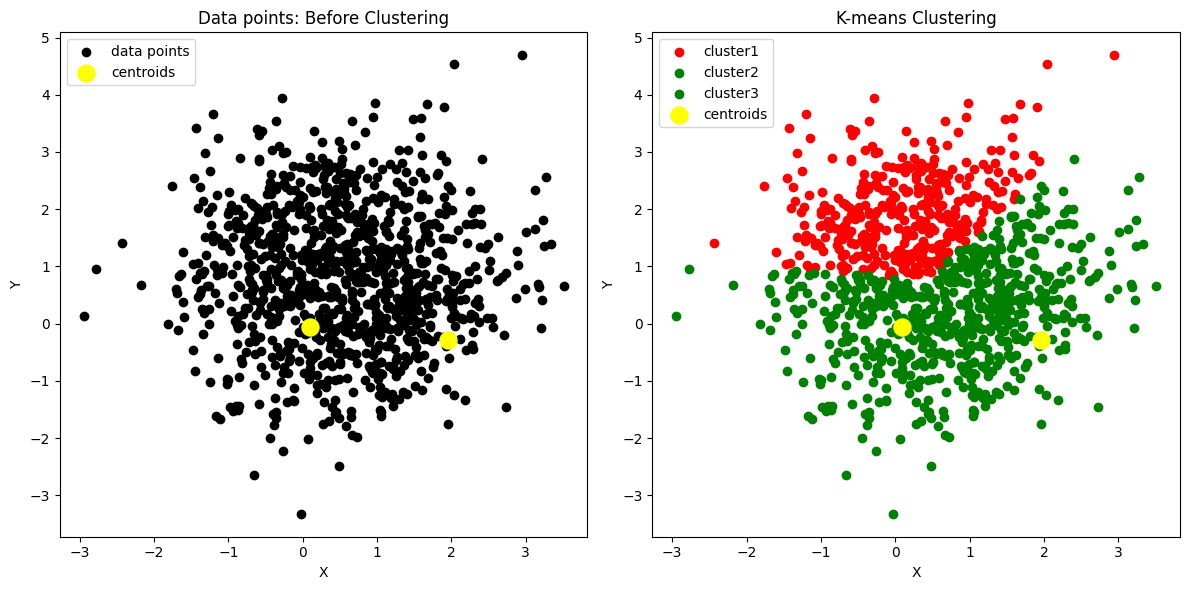

Iterations it took : 16


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import copy as cp

dataset1=np.random.multivariate_normal([1,0],[[0.9,0.4],[0.4,0.9]],500)
dataset2=np.random.multivariate_normal([0,1.5],[[0.9,0.4],[0.4,0.9]],500)
X=np.append(dataset1,dataset2,axis=0)
#print(X.shape)-(1000,2)
n=X.shape[0]#No. of objects , (p=X.shape[1])-No. of attributes
#k clusters
k=3
c=[] # intial centers
# k= int(input('Number of clusters : ')) 
for i in range(k):
  x,y=input('Intial Centers :').split()
  c.append([x,y])
for i in range(len(c)):
  for j in range(len(c[0])):
    c[i][j]=float(c[i][j])
c=np.array(c)
c=c.T
no_of_iterations = 10000
def mykmeans(X, k, c):
  iterations_take = 0 #How many iterations did it take to found centers for each cluster
  #create an array for distances wrt to number of objects n
  for i in range(no_of_iterations):
    distances=np.array([]).reshape(n,0)
    for j in range(k):
      l2_norm=np.sqrt(np.sum((X-c[:,j])**2,axis=1)) #Euclidean distance between the centroid/center and the object data point
      distances=np.c_[distances, l2_norm]
    C=np.argmin(distances,axis=1)+1 # finding the minimum distance between centroid and object data point so that we can create clusters accordingly.(finding nearest centroid)
    previous_center=np.zeros(c.shape)
    previous_center=cp.deepcopy(c)
    Y={} #storing the results i.e clusters and data-points assigned to that respective clusters. 
    for i in range(k):
      Y[i+1]=np.array([]).reshape(2,0)
    for j in range(n):
      Y[C[j]]=np.c_[Y[C[j]],X[j]] #cluster_no. - data points(x1,x2....xn). Assign the point xi to the respective cluster j.
    for x in range(k):
      Y[x+1]=Y[x+1].T #transpose
    for i in range(k):
      c[:,i]=np.mean(Y[i+1],axis=0)#mean of all points xi assigned to the cluster j gives new centroid(updated center).
    iterations_take+=1
    if(np.linalg.norm((previous_center - c),axis=None))<=0.001:
      break

    #Graph-Plot for visualization
  labels=['cluster1','cluster2','cluster3']
  
  
  plt.figure(figsize=(12, 6))

  # Plot data points before clustering
  plt.subplot(1, 2, 1)
  plt.scatter(X[:, 0], X[:, 1], c='black', label="data points")
  plt.scatter(c[:, 0], c[:, 1], s=150, c='yellow', label='centroids')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title("Data points: Before Clustering")
  plt.legend()

  # Plot K-means clustering results
  plt.subplot(1, 2, 2)
  for i in range(k):
      plt.scatter(Y[i+1][:, 0], Y[i+1][:, 1], c=colors[i], label=labels[i])
  plt.scatter(c[:, 0], c[:, 1], s=150, c='yellow', label='centroids')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title("K-means Clustering")
  plt.legend()

  plt.tight_layout()
  plt.show()

    
  print('Iterations it took :',iterations_take)
  return Y
cluster=mykmeans(X,k,c)